<font size = 9 color = '#17415F'>Interaktive Präsentationen und Dashboards mit Voìla

<font size = 6 color = '#17415F'>Widget & Voìla Basics
    
Voilà erlaubt die Präsentation von Inhalten ohne willkürliche Ausführung und Veränderung von Code durch Nutzer von Notebooks.
Es erlaubt ebenfalls die Nutzung von interaktiven Jupyter-Widgets. Die Interaktivität anderer Module wie z.B. plotly werden auch unterstützt.
Voilà kann individuell erweitert werden, zum Beispiel durch Templates zur Erstellung individueller Layouts.
Viele Beispiele finden sich in der [Voilà Gallery](https://voila-gallery.org/)
    
Wir werden vor mit einige IPython Widgets arbeiten, außerdem benötigen wir pandas und numpy zur Datenverarbeitung sowie plotly für die Visualisierung.

In [ ]:
from IPython.display import display, clear_output, Markdown
import ipywidgets as widgets

import datetime as dt
import numpy as np
import pandas as pd

import plotly.express as px

import warnings
warnings.filterwarnings("ignore")

<font size = 6 color = '#17415F'>Einfache Widgets
    
Der Grundstein eines Voìla Dashboards oder Reports sind Grafiken und Widgets. Voìla ermöglicht die Nutzung der IPython-Widgets. Diese sind sehr vielfältig und relativ leicht zu erstellen.

Im Folgenden schauen wir uns einige grundlegende Widgets an. Eine vollständige Liste findet sich [hier](https://ipywidgets.readthedocs.io/en/latest/examples/Widget%20List.html#).
    
    
### Integer Slider

In [ ]:
widgets.IntSlider(
    value = 5,
    min = 0,
    max = 10,
    step = 1,
    description = 'Slider',
    orientation = 'horizontal',
    readout = True) # set True for Number Display

### Float Range (Bereichs) Slider

In [ ]:
widgets.FloatRangeSlider(
    value=[3, 8],
    min=0,
    max=10,
    step=0.1,
    description='Float Range:',
    orientation='horizontal',
    readout=True)

### Float Text Angabe

In [ ]:
widgets.FloatText(
    value=5.5,
    step=0.1,
    description='Float Choice:')

### Textfeld

In [ ]:
widgets.Textarea(
#     value='Hello World',
    placeholder = 'Type something',
    description = 'String:',
    disabled = False) # change to False to activate

### Dropdown Auswahl

In [ ]:
widgets.Dropdown(
   value='Option 2',
    placeholder='Choose:',
    options=['Option 1', 'Option 2', 'Option 3', 'Option 4'],
    description='Dropdown:')

### Button

In [ ]:
widgets.Button(
    description='Refresh',
    disabled=False,
    button_style='', # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Description',
#     icon='check') #change icon
    icon = 'sync')

Button können ein Icon enthalten, jedes [Font Awesome](https://fontawesome.com/v5.15/icons?d=gallery&p=2) Icon kann durch seinen Namen genutzt werden.

### Radio Button

In [ ]:
widgets.RadioButtons(
    options=['Voila ist super', 'Voila ist OK', 'Ich weiß nicht'],
    value='Voila ist super',
    description='Umfrage:',
    disabled=False
)

### Multiple Selector

In [ ]:
widgets.SelectMultiple(
    options=['PickMe', 'AndMe', 'NotMe'],
    value=['PickMe'],
    rows=3,
    description='Options:',
    disabled=False
)

### Toggle Buttons (einfache Auswahl)

In [ ]:
widgets.ToggleButtons(
    options=['Slow ', 'Regular ', 'Fast '],
    description='Speed:',
    disabled=False,
    button_style='info', # 'success', 'info', 'warning', 'danger' or ''
    tooltips=['Description of slow', 'Description of regular', 'Description of fast'],
    icons=['check'] * 3,
)

### Kalender zur Datumswahl

In [ ]:
widgets.DatePicker(
    description='Choose a date',
    disabled=False
)

### Farbauswahl

In [ ]:
widgets.ColorPicker(
    concise=False,
    description='Color',
    value='yellow',
    disabled=False
)

<font size = 6 color = '#17415F'>Layouts

Sowohl IPython Widgets als auch Voìla unterstützen eine große Auswahl an Layout Optionen von einfachen Boxen, über Templates bis CSS.
Wir wollen uns hier auf Boxen als eine einfach aber effektive Layout Option fokussieren.

Einzelne Widgets können in Boxen kombiniert werden. So können zusammengehörige Einstellungen gruppiert werden.

### Box, VBox, HBox

In [ ]:
speed = widgets.ToggleButtons(
    options=['Slow', 'Regular', 'Fast', 'Fastest'],
    description='Speed:',
    disabled=False,
    button_style='info',
)

date = widgets.DatePicker(
    description='Date',
    disabled=False
)

color = widgets.ColorPicker(
    concise=False,
    description='Color',
    value='yellow',
    disabled=False
)

widgets.Box(children = [speed, date, color])

In [ ]:
widgets.VBox([speed, date, color])

In [ ]:
widgets.HBox([speed, date, color])

### Boxen kombinieren

In [ ]:
# combined
left_box = widgets.HBox([speed])
right_box = widgets.VBox([date,color])
widgets.HBox([left_box,right_box])

### GridBox

In [ ]:
widgets.GridBox([speed, date, color],
                layout=widgets.Layout(grid_template_columns='repeat(1, 250px)'))


In [ ]:
widgets.GridBox([speed, date, color],
                layout=widgets.Layout(grid_template_columns='repeat(3, 270px)'))

In [ ]:
accordion = widgets.Accordion(children=[speed, date, color])
accordion.set_title(0, 'Speed')
accordion.set_title(1, 'Date')
accordion.set_title(2, 'Color')
accordion

In [ ]:
tab = widgets.Tab(children=[speed, date, color])
tab.set_title(0, 'Speed')
tab.set_title(1, 'Date')
tab.set_title(2, 'Color')
tab

<font size = 6 color = '#17415F'>Verbinden von Widgets und Grafiken
    
Bisher wurden nur Widgets erstellt, die keine wirkliche Funktionalität aufweisen.
    
Im Folgenden verbinden wir ein Widget mit einem einfachen Beispielplot.

In [ ]:
x = np.arange(0,25,0.2)
y = np.random.rand(x.shape[0])

Wir erstellen das Widget wie gehabt und weisen es einer Variable zu

In [ ]:
range_select = widgets.FloatRangeSlider(
    value=[0, 25],
    min=0,
    max=25,
    step=0.2,
    description='Float Range:',
    orientation='horizontal',
    readout=True,
)

### `.value` Attribut

Die aktuellen Werte des Widgets (in unserem Fall der Start- und Endpunkt der Float Range) befinden sich im `.value` Attribut des Widget-Objektes. Dieses Attribut wird benötigt um die Werte des Widgets auszulesen.

In [ ]:
range_select

In [ ]:
range_select.value

### Die Verbindung

Nun verbinden wir das Widget mit einem Plot.

Zunächst kreieren wir ein Output Widget. Dieses "unsichtbare" Widget ermöglicht es uns den Output immer wieder neu zu laden wenn wir Veränderungen (z.B. an der Range) vorgenommen haben.

Später kreieren wir noch einen Button welcher den Plot neu lädt wenn wir Veränderungen vorgenommen haben.

Danach definieren wir zwei Funktionen. 

Die erste erstellt unsere einfach Visualisierung, als Argument nimmt sie `x_range`.

Die zweite Funktion bestimmt was passiert wenn wir den Button klicken. In unserem Fall wird die Visualisierung erstellt, als Wert für `x_range` nutzen wir `range_select.value`. 
So können wir die aktuelle Auswahl des X-Achsenbereichs durch das Widget in unserer Visualisierung widerspiegeln.
Wir spezifizieren außerdem über welches Output Widget die neue Darstellung erzeugt werden soll und löschen den alten Output.

Nachdem wir die Funktion dem Button zugewiesen haben, müssen wir die einzelnen Widgets nur noch anzeigen.

In [ ]:
# Create output widget
out_line = widgets.Output()

# define visualization and update functions
def visualize_fig(x_range):
    fig = px.line(x = x, 
                  y = y,
                  range_x = x_range)
    return fig

def click(button_in):
    fig = visualize_fig(range_select.value)
    with out_line:
        clear_output(wait = True)
        fig.show()
        
# Create Button        
button=widgets.Button(description = 'Show Plot',
                     icon = 'chart-bar')
button.on_click(click)

# Display
display(range_select)
display(button)
button.click() # one click to load initial plot
display(out_line)

<font size = 9 color = '#17415F'>Erste Anwendung auf relevante Plots
    
Wir wollen das gelernte nun auf die Reddit Daten anwenden um einen ersten Plot zu erstellen.
    
Dieser Plot soll uns helfen die Daten interaktiv zu explorieren und ggf. zu präsentieren.
    
Am Ende soll er mit dem Plot aus dem vorherigen Vortrag auf einem Dashboard dargestellt werden.
    
Wir lesen zunächst die Daten ein. Wenn du in Colabs arbeitest musst du diese zunächst in dein working directory laden.

In [ ]:
! gdown https://drive.google.com/uc?id=1RLih7ScFrx_uJqdbtr0X85e8W-G1i3OT

In [ ]:
df = pd.read_csv('/content/tech-trans-final.csv', index_col = [0])
mask = df['year'] > 2014
df = df.loc[mask,:]
df.head()

Uns interessieren die Upvotes und die Anzahl der Kommentare. Um besonders relevante Tage und Ereignisse zu erkennen plotten wir die durchschnittliche Anzahl der Upvotes und Kommentare pro Tag.

Wir wollen dann noch ein kleines Tool erstellen, welches es uns erlaubt den Post mit den meisten Upvotes oder Kommentaren an einem bestimmten Datum zu lesen.

In [ ]:
df['date'] = pd.to_datetime(df[['year', 'month', 'day']])
grouped_date = df.groupby(['date']).agg('mean').reset_index()
grouped_date = grouped_date.drop(['month','year','day'], axis = 1)
grouped_date.head()

Diese Plots wollen wir interaktiv darstellen.

In [ ]:
fig = px.line(grouped_date,
       x = 'date',
       y = 'ups')
fig.show()

In [ ]:
fig = px.line(grouped_date,
       x = 'date',
       y = 'num_comments')
fig.show()

So könnte das Auslesen des relevantesten Posts gestaltet werden.

In [ ]:
mask = (df.loc[:,'date'] == '2018-07-07')
idx = df.loc[mask,['title','ups']].nlargest(1, columns = 'ups').index
print(df.loc[idx[0],'title'])

<font size = 6 color = '#17415F'>Kombinieren der Plots und der Textsuche Funktion

Wir wollen nun die Plots kombinieren, interaktiv darstellen und zusätzlich mit der Textsuche vereinen.
    
### Widgets erstellen

In [ ]:
col_select = widgets.ToggleButtons(
    options=['Upvotes ', 'Comments '],
    description='Display:',
    disabled=False,
    button_style='info',
    tooltips=['Plot number of upvotes per day', 'Plot number of comments per day'],
    icons=['angle-up','comments']
)
#col_select

In [ ]:
range_year = widgets.IntRangeSlider(
    value=[2015, 2021],
    min=2015,
    max=2021,
    step=1,
    description='Year Range:',
    orientation='horizontal',
    readout=True,
)
#range_year

### Widgets mit Plot verbinden

In [ ]:
# Create output widget
out_line_1 = widgets.Output()

# define visualization and update functions
def visualize_fig_1(x_range, col_selected):
    x_start = x_range[0]
    x_end = x_range[1]
    col = 'ups' if col_selected == 'Upvotes ' else 'num_comments'
    
    fig = px.line(grouped_date,
                  x = 'date',
                  y = col,
                  range_x = [f"{x_start}-01-01",
                             f"{x_end}-12-31"])
    
    fig.update_layout(
                  template = 'plotly_white',
                  width = 1200,
                  height = 400)
    
    return fig

def click_1(button_in):
    fig = visualize_fig_1(range_year.value,
                       col_select.value)
    with out_line_1:
        clear_output(wait = True)
        fig.show()
        
# Create Button        
button_1=widgets.Button(description = 'Show Plot',
                     icon = 'chart-bar')
button_1.on_click(click_1)

# Display
tab_fig = widgets.Tab([col_select,range_year])
tab_fig.set_title(0, 'Column')
tab_fig.set_title(1, 'Year Range')

box_fig = widgets.GridBox([tab_fig,button_1],
                         layout = widgets.Layout(grid_template_columns = '950px 100px'))

display(box_fig)
button_1.click() # One click to load initial plot
display(out_line_1)

<font size = 6 color = '#17415F'>Widgets für Textsuche erstellen und verbinden

In [ ]:
date_picker = widgets.DatePicker(
    description='Date',
    disabled=False,
)
# date_picker

In [ ]:
# Create output widget
out_text = widgets.Output()

# define visualization and update functions
def display_text(date, col):
    try:
        date = date.strftime('%Y-%m-%d')
        col = 'ups' if col == 'Upvotes ' else 'num_comments'
        mask = (df.loc[:,'date'] == date)
        idx = df.loc[mask,['title','ups','num_comments']].nlargest(1, columns = col).index
        return df.loc[idx[0],'title']
    except (IndexError, AttributeError):
        return '**No data available please choose a date between 2015-01-01 and 2021-06-23**'

def click_text(button_text_in):
    text = display_text(date_picker.value, 
                        col_select.value)
    with out_text:
        clear_output(wait = True)
        try:
            display(Markdown(text))
        except TypeError:
            display(Markdown('**Text cannot be retrieved**'))
# Create Button        
button_text=widgets.Button(description='Show Top Post',
                     icon = 'reddit')
button_text.on_click(click_text)

# Display
box_temp = widgets.GridBox([date_picker,button_text],
                           layout=widgets.Layout(grid_template_columns='repeat(2, 310px)'))

box_date = widgets.GridBox([box_temp,out_text],
                           layout=widgets.Layout(grid_template_columns='620px 700px'))

accordion_date = widgets.Accordion([box_date])
accordion_date.set_title(0, 'View Top Post')
display(accordion_date)

#display(out_text)

______________________________
<font color = '#17415f' size = 4.5> Dir hat das Webinar gefallen? <br> Dann besuch uns doch auf [unserer Homepage](https://stackfuel.com). <br>

<font color = '#17415f' size = 4.5> Dort findest du weitere Trainings im Bereich Data, Machine Learning und AI. 



Euer Stackfuel Team.

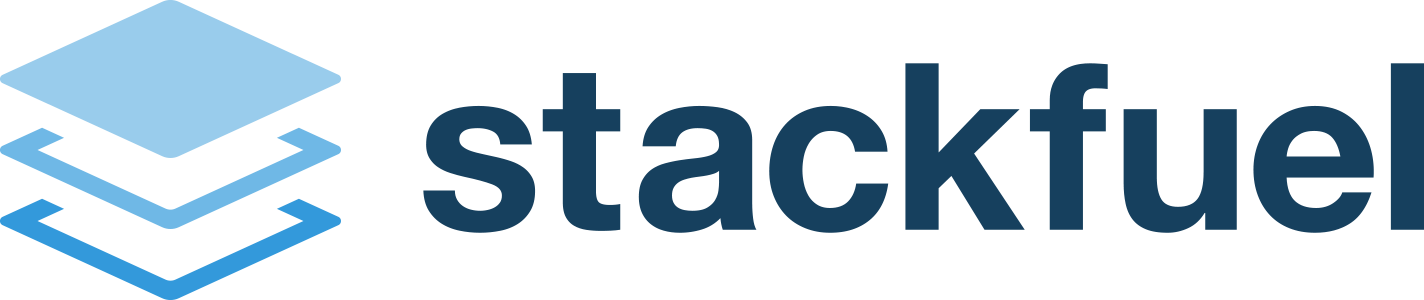